$\def\tQ{\tilde{Q}}
\def\D{\mathcal{D}}
\def\E{\mathcal{E}}
\def\F{\mathcal{F}}
\def\H{\mathcal{H}}
\def\cP{\mathcal{P}}
\def\cC{\mathcal{C}}
\def\W{\mathcal{W}}
\def\AA{\mathbb{A}}
\def\C{\mathbb{C}}
\def\N{\mathbb{N}}
\def\M{\mathcal{M}}
\def\L{\mathcal{L}}
\def\Z{\mathbb{Z}}
\def\Q{\mathcal{Q}}
\def\R{\mathbb{R}}
\def\S{\mathcal{S}}
\def\p{\partial}
\def\T{\mathcal{T}}
\def\Tq{\widetilde{T}}
\def\I{\mathcal{I}}
\def\k{\mathcal{k}}
\newcommand{\A}{\mathcal A}
\def\o{\omega}
\def\a{\alpha}
\def\b{\beta}
\def\g{\gamma}
\def\d{\delta}
\def\G{\Gamma}
\def\l{\lambda}
\def\t{\theta}
\def\f{\frac}
\newcommand{\Sh}{\mathcal S\! \mathcal H}
\newcommand{\cR}{\mathcal R}
\newcommand{\cB}{\mathcal B}
\newcommand{\cQ}{\mathcal Q}
\newcommand{\sing}{\text{sing }\!}
\newcommand{\card}{\text{card }\!}
\renewcommand{\span}{\text{span }\!}
\def\sinc{\mbox{\rm sinc}}
\def\db{\textcolor{blue}}$



$\newcommand{\ip}[2]{\langle#1,#2\rangle}$


# Tarea 2
## Nombre: Edgar Daniel Tarraga Torrez.



In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Preparación de datos
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

¿Qué datos son?

In [4]:
## ejecute el comando
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
### Preparación de datos
n_samples, n_features = X.shape

# scale
sc = StandardScaler()
X = sc.fit_transform(X)
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)

In [6]:
X.shape

torch.Size([569, 30])

### ¿Qué hace StandardScaler?
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html



In [7]:
from torch.utils.data import Dataset


class CreateDataset(Dataset):
    def __init__(self, x, y):
        self.x = x

        self.y = y

    def __getitem__(self, index):

        sample = [self.x[index],self.y[index]]

        return sample


    def __len__(self):

        return len(self.x)

In [8]:
datos1=CreateDataset(X,y)
### Dividimos los datos entre datos de entrenamiento y de prueba.
train_size = int(0.8 * len(datos1))
test_size = len(datos1) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(datos1, [train_size, test_size])

### ¿Qué hace el DataLoader?

In [9]:
####

In [10]:
#### Respuesta.

In [11]:
from torch.utils.data import DataLoader
batch_size=100
cargarDatos = DataLoader(train_dataset, batch_size, shuffle=True)

In [12]:
### Definimos el modelo de regresión logística

class LogisticRegression(torch.nn.Module):

    def __init__(self, input_dim, output_dim):

        super(LogisticRegression, self).__init__()

        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

In [13]:
### Creamos el modelo.

torch.manual_seed(1)

modelD=LogisticRegression(n_features,1)
print(modelD.state_dict())

OrderedDict([('linear.weight', tensor([[ 0.0941, -0.0806, -0.0354,  0.0857, -0.1719,  0.1095, -0.0376,  0.0929,
          0.0254, -0.0224,  0.0506,  0.0090,  0.0667, -0.0711, -0.0133, -0.0164,
          0.0265, -0.0007,  0.1596,  0.0568, -0.0680, -0.1103, -0.0306, -0.0788,
         -0.0585,  0.0087,  0.1088,  0.0992, -0.1785,  0.1132]])), ('linear.bias', tensor([0.0510]))])


In [14]:

### Definimos el método de optimización. El Stochastic Gradient Descent.
learning_rate=0.001

optimizer1 = torch.optim.SGD(modelD.parameters(), lr=learning_rate)

### Definimos el criterio de pérdida o función costo.
criterio = torch.nn.BCELoss() ## Binary cross entropy.

### ¿Cuántos batches o lotes hay?

In [15]:
num_examples=len(train_dataset)
num_batches = num_examples / batch_size
num_batches

4.55

In [16]:
### Creamos una lista para almacenar las pérdidas.
losses = []
###

In [17]:
#modelD(list(enumerate(cargarDatos))[0][1][0])

In [18]:
### Malla for de optimzación. For loop.

#### Complete el for loop.

epochs = 100
num_batches = num_examples / batch_size


for e in range(epochs):
    cumulative_loss = 0
    # inner loop, malla interna
    for i, (data, y) in enumerate(cargarDatos):


        #### método forward.

        yhat = modelD(data)

        ### pérdida o costo.

        loss = criterio(yhat, y.view(-1,1))

        ### cálculo de la derivada.
        loss.backward()

        ### x_k+1 = x_k - lr* grad(loss), método de optimización.
        optimizer1.step()

        ### reset o puesta a cero del gradiente del optimizador.
        optimizer1.zero_grad()


        cumulative_loss = cumulative_loss+loss.item()


    losses.append(cumulative_loss /num_batches)


Text(0, 0.5, 'pérdida o costo')

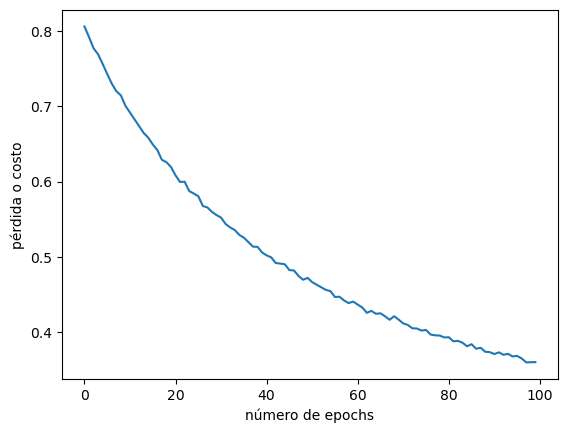

In [19]:
### Graficamos la pérdida
plt.plot(losses)
plt.xlabel('número de epochs')
plt.ylabel('pérdida o costo')

### Realice el for loop para 50, 100, 150, 200, 300, 400 epochs
### ¿Qué pasa con la pérdida?

### Curva ROC

In [20]:
### Utilizamos los datos de prueba test_data.

In [21]:
datosPrueba=DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=True)
yhat=modelD(list(datosPrueba)[0][0]).detach().view(1,-1)[0].numpy()  ## valores de predicción.

y=list(datosPrueba)[0][1].numpy()  # true labels, valores reales.

In [22]:
### Separamos los datos de predicción correspondientes a los datos de
predic1=yhat[y>0.5]  ### valores de predicción con true label 1.
predic2=yhat[y<0.5]  ### valores de predicción con true label 0.

In [23]:
#Cálculo de valores para la curva ROC

threshold=np.arange(0,1.1,0.01)
sensitividadlist=[]
especificidad1list=[]
threshold

for i in range(len(threshold)):


    TP=len(predic1[ predic1 > threshold[i]  ])  ### Verdadero positivo
    FN= len(predic1)-TP ### Falso negativo


    sensitividad=TP/(TP+FN)
    sensitividadlist.append(sensitividad)

    FP=len(predic2[predic2>threshold[i] ])  ### Verdadero negativo
    TN=len(predic2)-FP   #### Falso positivo

    especificidad1=FP/(FP+TN)

    especificidad1list.append(especificidad1)


    especificidad1
    #print(threshold[i])
    #print(alpha,Power)

Text(0, 0.5, 'Verdadero Positivo')

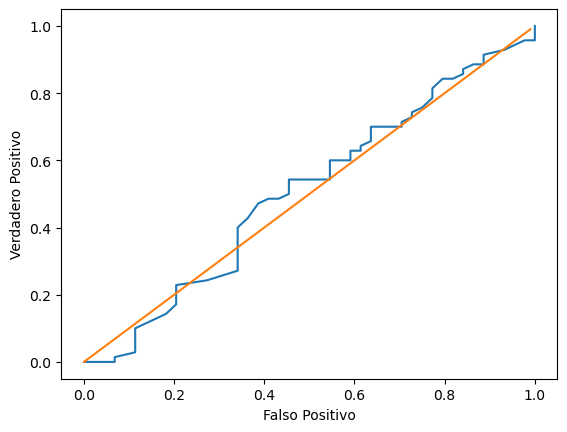

In [24]:
plt.plot(especificidad1list,sensitividadlist)
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01))
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadero Positivo')

### Cálculo del Acuracy o Exactitud

#  $accuracy=\frac{Nro\,predicciones\, correctas}{Nro\,total\, predicciones}$

## Calcule el accuracy con los datos de prueba (test_dataset) para cada uno de los números de epoch antes mencionados.

### ¿Qué modelo seleccionarí?